# Preliminaries

In [1]:
using SHA
using DataFrames
using CSV
using Plots
using StatsBase
using Arrow

# 1 

**Use the "housing.data" file from the UCI repository. You can learn more about the dataset from the "housing.names" file also available on UCI data repository. You should download the file from the internet using Julia.**

The [`download()` function](https://docs.julialang.org/en/v1/stdlib/Downloads/#Downloads.download) downlaods a file from the given url, saving it to `output` or if not specified, a temporary path.

In [2]:
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
DATA = download(URL, "housing.data")

"housing.data"

# 2 

**Check that file has been fetched correctly by calculating its SHA1 hash and compare it to the following reference value:**

```
[0xad, 0xfa, 0x6b, 0x6d, 0xca,
 0x24, 0xa6, 0x3f, 0xe1, 0x66,
 0xa9, 0xe7, 0xfa, 0x01, 0xce,
 0xe4, 0x33, 0x58, 0x57, 0xd1]
```

The [`sha1()` function](https://docs.julialang.org/en/v1/stdlib/SHA/#SHA) calculates a SHA1 hash.

In [3]:
expected = [0xad, 0xfa, 0x6b, 0x6d, 0xca,
 0x24, 0xa6, 0x3f, 0xe1, 0x66,
 0xa9, 0xe7, 0xfa, 0x01, 0xce,
 0xe4, 0x33, 0x58, 0x57, 0xd1
]
sum(expected)

0x0000000000000b89

## Opening a file

We open the data file by creating an anonymous functiong using [`do` keyword](https://docs.julialang.org/en/v1/base/base/#do) and the [`open()` function](https://docs.julialang.org/en/v1/base/io-network/#Base.open). The `do` keyword creates an anonymous function and passes it as the first argument to a function call.  

*Note: the `DATA` variable is just a path to local file.*

Here we compare the actual SHA1 hash with the expected value:

In [4]:
open(DATA) do f
    actual = sum(sha1(f))
    sum(actual) == sum(expected)
end

true

# 3 

**Load data into Julia’s DataFrame. Examine the basic descriptive statistics of the dataset.**

The housing data is tab-delimited and stored in the local file: `housing.data`.

To load our data into a `DataFrame`, we must first read it using [`CSV.File()` function](https://csv.juliadata.org/stable/reading.html#CSV.File). We pass in the filepath, an array of column names (data does not have a header), a `" "` as the delimiter, and `ignorerepeated=true`.  The `ignorerepeated=true` parameter ignores repeated spaces, treating any n-space breaks as a delimiter.  For more on [dealing with tab/space delimited files](https://csv.juliadata.org/stable/examples.html#ignorerepeated_example).

In [5]:
col_names = [
    "CRIM", "ZN", "INDUS", "CHAS",
    "NOX", "RM", "AGE", "DIS",
    "RAD", "TAX", "PTRATIO", "B",
    "LSTAT", "MEDV"
]
housing = DataFrame(CSV.File(DATA, header=col_names, delim=" ", ignorerepeated=true))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX
,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Int64,Float64
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0
6,0.02985,0.0,2.18,0,0.458,6.43,58.7,6.0622,3,222.0
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0


## Descriptive Statistices

The [`describe()` function](https://dataframes.juliadata.org/stable/lib/functions/#DataAPI.describe) returns descriptive statistics for a data frame as a new `DataFrame` where each row represents a variable and each column a summary statistic.

In [6]:
describe(housing)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,CRIM,3.61352,0.00632,0.25651,88.9762,0,Float64
2,ZN,11.3636,0.0,0.0,100.0,0,Float64
3,INDUS,11.1368,0.46,9.69,27.74,0,Float64
4,CHAS,0.06917,0,0.0,1,0,Int64
5,NOX,0.554695,0.385,0.538,0.871,0,Float64
6,RM,6.28463,3.561,6.2085,8.78,0,Float64
7,AGE,68.5749,2.9,77.5,100.0,0,Float64
8,DIS,3.79504,1.1296,3.20745,12.1265,0,Float64
9,RAD,9.54941,1,5.0,24,0,Int64


# 4

**Identify nominal and continuous variables in the dataset. Create two variables nominal and continuous that will store vectors holding the column names.**

We use the [`findall()` function](https://docs.julialang.org/en/v1/base/arrays/#Base.findall-Tuple{Any}) to return the indices of an array where a certain condition is `true`. The [`eachcol()` function](https://dataframes.juliadata.org/stable/lib/functions/#Base.eachcol) provides column-by-column iteration over a `DataFrame`.

The cell below returns the indices of columns with types of either `Float64` or `Int64`, distinguishing between nominal and continuous variables. We apply an anonymous function `x -> typeof(x) === Vector{Int64}` to each column of the `housing` data.

For more on [iterating over DataFrames](https://dataframes.juliadata.org/stable/lib/functions/#Iteration)


In [7]:
nominal_idx = findall(x -> typeof(x) === Vector{Int64}, eachcol(housing))
continous_idx = findall(x -> typeof(x) === Vector{Float64}, eachcol(housing))

nominal = housing[!, nominal_idx]
continous = housing[!, continous_idx]

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.00632,18.0,2.31,0.538,6.575,65.2,4.09,296.0,15.3
2,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8
3,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8
4,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7
5,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7
6,0.02985,0.0,2.18,0.458,6.43,58.7,6.0622,222.0,18.7
7,0.08829,12.5,7.87,0.524,6.012,66.6,5.5605,311.0,15.2
8,0.14455,12.5,7.87,0.524,6.172,96.1,5.9505,311.0,15.2
9,0.21124,12.5,7.87,0.524,5.631,100.0,6.0821,311.0,15.2


# 5

**Inspect the distribution of nominal variables. To do this produce tables with the counts of each level for all nominal variables.**

We use the `groupby()` function to group our nominal data by category, and then aggregate the results using the `combine()` and `nrow()` functions. The use of `nrow` effectively executes a groupby and count operation.

For more on [DataFrames Split-Apply-Combine](https://dataframes.juliadata.org/stable/man/split_apply_combine/).

In [8]:
combine(groupby(nominal, :CHAS), nrow)

,CHAS,nrow
,Int64,Int64
1,0,471
2,1,35


In [9]:
combine(groupby(nominal, :RAD), nrow)

,RAD,nrow
,Int64,Int64
1,1,20
2,2,24
3,3,38
4,4,110
5,5,115
6,6,26
7,7,17
8,8,24
9,24,132


# 6

**Check the distributions of continuous variables by producing histograms for each variable.**

We define a function to plot a grid of histogram subplots, given a `DataFrame` object.

We'll use a list comprehension (similar to Python) to create an array of plots that is input to the `plot()` function. We'll again use the `eachcol()` function to iterate of the dataframe, and the [`pairs()` function](https://dataframes.juliadata.org/stable/lib/functions/#Base.pairs) to zip up (think Python's `zip()` function) each column's name with its data array. We can then iterate over this to create a histogram of each data series using the [`histogram()` function](https://docs.juliaplots.org/latest/generated/plotlyjs/#plotlyjs-ref15). 

Arguments for `histogram()` are listed in the [series attributes](https://docs.juliaplots.org/latest/generated/attributes_series/).

We pass in our array of plots using the [splat operator](https://docs.julialang.org/en/v1/base/base/#Base.splat) to the [`plot()` function](https://docs.juliaplots.org/latest/basics/) to create a new plot object. We create subplots using the `layout` argument, passing the number of plots (in this case columns) that we want to create; we could also specify a shape (e.g. grid(3, 4)). For more [plot attributes](https://docs.juliaplots.org/latest/generated/attributes_plot/) and [subplot attributes](https://docs.juliaplots.org/latest/generated/attributes_subplot/).

For more on [plotting an array of plots](https://discourse.julialang.org/t/how-to-plot-an-array-of-plots/51078).


In [10]:
function histogram_grid(data::DataFrame)
    p = [histogram(series, title=col, label=nothing) for (col, series) in pairs(eachcol(data))]
    plot(p..., layout=ncol(data), size=(800,500), titlefontsize=8)
end

histogram_grid (generic function with 1 method)

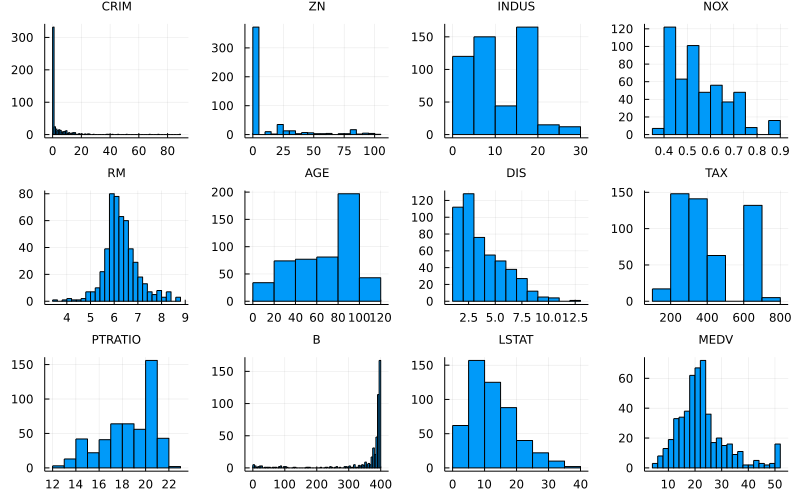

In [11]:
histogram_grid(continous)

# 7

**The analysis of histograms unveils a pattern in the target (MEDV) variable there is a strange spike for the highest value of the median house price (confirm in your code that it is 50.0). There are several different ways to handle this situation. For the purpose of this project, remove observations with MEDV equal to 50.0 as we cannot be sure about the quality of this information.**

We'll create a boolean mask `is50` and then use the [`deleteat!()` function](https://dataframes.juliadata.org/stable/lib/functions/#Base.deleteat!) to remove, in-place, rows where the mask is `true`.

*Of note:*

1. The [`.` syntax](https://docs.julialang.org/en/v1/manual/functions/#man-vectorized), placed before `==50` vectorizes the preceding function.
2. The [`!` syntax](https://docs.julialang.org/en/v1/manual/style-guide/#bang-convention) following the function name `deleteat` is standard Julia syntax to indicated an in-place operation.

An alternative method uses the [`filter()` function](https://dataframes.juliadata.org/stable/lib/functions/#Filtering-rows) to filter rows based on a boolean condition:

Example using filter:

```julia
filter(x -> x[:MEDV]!=50.0, continous)
```

In [12]:
is50 = housing[!, :MEDV] .== 50
deleteat!(housing, is50)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX
,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Int64,Float64
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0
6,0.02985,0.0,2.18,0,0.458,6.43,58.7,6.0622,3,222.0
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0


# 8 

**Produce Kendall’s Tau correlation matrix of variables. We can analyze relationships between all ordinal and continuous features this way. Additionally, Kendall’s correlation assumes that feature relations are monotonic but not necessarily linear, as in the case of Pearson’s correlation.**

The [`corrkendall()` function](https://juliastats.org/StatsBase.jl/stable/ranking/#StatsBase.corkendall) calculates Kendall's correlation. Note that we must first convert our housing `DataFrame` into a `Matrix`. We recreate a `DataFrame` and pass in the original column names.

In [13]:
corr = DataFrame(corkendall(Matrix(housing)), names(housing))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.0,-0.458266,0.520867,0.0187153,0.594802,-0.218774,0.489837
2,-0.458266,1.0,-0.530466,-0.0364009,-0.514629,0.279787,-0.424882
3,0.520867,-0.530466,1.0,0.0570377,0.616625,-0.299508,0.483657
4,0.0187153,-0.0364009,0.0570377,1.0,0.046477,0.0163709,0.0384825
5,0.594802,-0.514629,0.616625,0.046477,1.0,-0.224779,0.587438
6,-0.218774,0.279787,-0.299508,0.0163709,-0.224779,1.0,-0.19728
7,0.489837,-0.424882,0.483657,0.0384825,0.587438,-0.19728,1.0
8,-0.5359,0.484681,-0.57237,-0.0376498,-0.685598,0.197309,-0.606725
9,0.556161,-0.224992,0.350976,0.00896455,0.426594,-0.0708855,0.296536


# 9

**Visualize the correlation matrix as a heatmap, sorting the rows and columns by the correlation with the MEDV target variable.**

We use the [`sortperm()` function](https://dataframes.juliadata.org/stable/lib/functions/#Base.sortperm) to return indices of lowest-to-highest values; we'll store as variable `order`. With this `order` we can reorder the column names and correlation matrix to create an ordered heatmap of correlations. Note that we change the series color using the `c` argument, setting it to `:balance` color map. The many attributes and their aliases are [listed here](https://docs.juliaplots.org/latest/generated/attributes_series/).

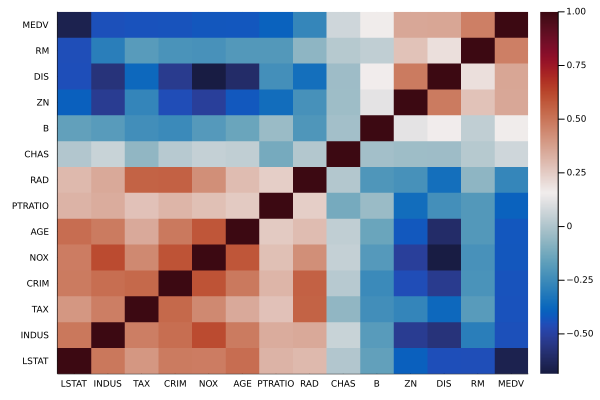

In [14]:
order = sortperm(corr[:, end])
plot(heatmap(names(corr)[order], names(corr)[order], Matrix(corr[order, order]), c=:balance), tickfontsize=6)

# 10

**Produce a data frame showing all variables and their correlation with MEDV. Sort this data frame by absolute value of correlation (to group together the least and most correlated variables).**

Like the preceding cell, we use the `sortperm()` function to sort the correlations. However, this time we sort in reverse order by setting the `rev` argument to `true`; we also take the absolute value of correlations using the `abs()` function with dot-syntax `abs.()` to vectorize the function.

In [15]:
abs_order = sortperm(abs.(corr)[:, end], rev=true)

corr[abs_order, abs_order]

,MEDV,LSTAT,RM,INDUS,TAX,CRIM,NOX,AGE
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.0,-0.658586,0.471074,-0.448465,-0.440709,-0.438928,-0.428623,-0.427413
2,-0.658586,1.0,-0.455255,0.493072,0.402941,0.483386,0.479634,0.522331
3,0.471074,-0.455255,1.0,-0.299508,-0.185187,-0.218774,-0.224779,-0.19728
4,-0.448465,0.493072,-0.299508,1.0,0.474513,0.520867,0.616625,0.483657
5,-0.440709,0.402941,-0.185187,0.474513,1.0,0.535601,0.444464,0.349475
6,-0.438928,0.483386,-0.218774,0.520867,0.535601,1.0,0.594802,0.489837
7,-0.428623,0.479634,-0.224779,0.616625,0.444464,0.594802,1.0,0.587438
8,-0.427413,0.522331,-0.19728,0.483657,0.349475,0.489837,0.587438,1.0
9,-0.396202,0.32111,-0.196914,0.341488,0.280815,0.316977,0.285893,0.257319


# 11

**Plot each continuous variable on a scatterplot against the MEDV variable and add a linear regression estimate to the plot. We want to visually assess the linearity of the relationship with the target variable.**

We define a `scatter_grid()` function, similar to the `histogram_grid()` function to create our grid of scatter plots. We again use a list comprehension with the `scatter()` function to create an array of plots. To add a regression line, set the `smooth` parameter to `true`. We can control the line color and line width using the `lc` and `lw` arguments, respectively. We also set the market alpha to `.4` and the marker stroke width to `0` using the `ma` and `msw` parameters, respectively. Plot attributes are [listed here](https://docs.juliaplots.org/latest/generated/attributes_series/).

In [16]:
function scatter_grid(X::DataFrame, y::Vector)
    p = [
        scatter(series, y, title=col, label=nothing, smooth=true, lc=:red, lw=2, ma=.4, msw=0) 
        for (col, series) in pairs(eachcol(X))
        ]
    plot(p..., layout=ncol(X), size=(800,500), titlefontsize=8)
end

scatter_grid (generic function with 1 method)

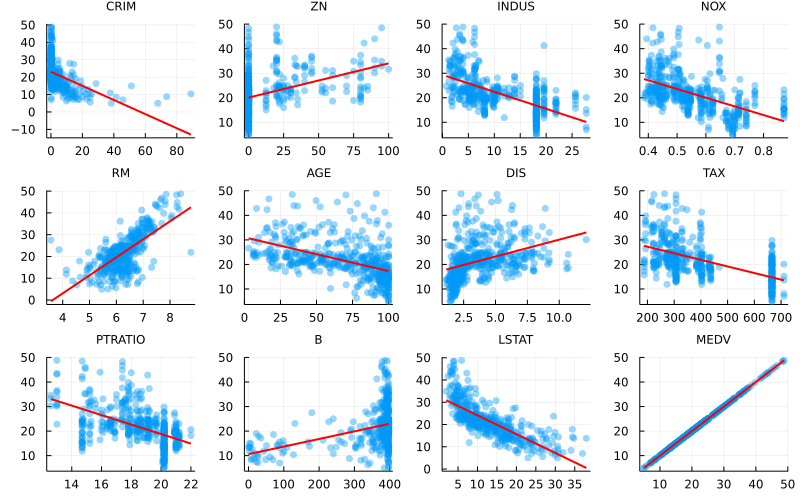

In [17]:
scatter_grid(continous, continous[:, end])

# 12

**Remove the least correlated feature B from the dataset.**

We'll use the [`select!()` function](https://dataframes.juliadata.org/stable/lib/functions/#DataFrames.select), with bang syntax `!` to select in-place, to select all columns except feature `B`. The [`Not()` column selector](https://dataframes.juliadata.org/stable/man/basics/#Not,-Between,-Cols,-and-All-Column-Selectors) lets us specify all columns except `B`.

In [18]:
select!(housing, Not(:B))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX
,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Int64,Float64
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0
6,0.02985,0.0,2.18,0,0.458,6.43,58.7,6.0622,3,222.0
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0


# 13

**By examining the numeric data distribution, we know that the CRIM, ZN and DIS variables are skewed. Transform CRIM and DIS features using logarithmic transformation and bin ZN column to 0 if ZN has value of 0 and to 1 otherwise.**

We'll use the `log()` function with `.()` dot syntax to log transform each data array.

The [`ifelse()` function](https://docs.julialang.org/en/v1/base/base/#Core.ifelse) returns x if condition is true, otherwise return y. We'll use this inside a list comprehension to replace any non-zero value with `1`.


In [19]:
for col in [:CRIM, :DIS]
    housing[:, col] = log.(housing[:, col])
end

In [20]:
housing[:, :ZN] = [ifelse(x==0, x, 1) for x in housing[:, :ZN]]

490-element Vector{Real}:
 1
 0.0
 0.0
 0.0
 0.0
 0.0
 1
 1
 1
 1
 1
 1
 1
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

# 14

**Calculate the mean of MEDV and 90% bootstrap confidence intervals for the mean value of MEDV for each category of nominal variables: CHAS, RAD and ZN. (We binned ZN in the previous step, so we now consider it a nominal variable.) Visualize the results with bootstrap confidence intervals as error bars for each category.**

We first create a `bootstrap()` function to use in our groupby-apply execution.  We'll use list comprehension and the [`rand()` function](https://docs.julialang.org/en/v1/stdlib/Random/#Base.rand) to generate `n=10,000` samples (with replacement) from a given array, storing the `mean()` of each sample. Next, we'll use the [`percentile()` function](https://juliastats.org/StatsBase.jl/stable/scalarstats/#StatsBase.percentile) to return the 5th and 95th percentiles (for a 90% CI). *Note that the desired percentile is pass as an integer argument.*

We'll use a [dictionary](https://docs.julialang.org/en/v1/base/collections/#Base.Dict) to store our tables for display and later plotting.

We groupby each nominal category and calculate the mean and boostrap CI for `MEDV`.  Note that we use the [pair operator `=>`](https://docs.julialang.org/en/v1/base/collections/#Core.Pair) to map the column `:MEDV` to our `bootstrap()` function for aggregation; then, we map this result to the [`AsTable` function](https://dataframes.juliadata.org/stable/lib/types/#DataFrames.AsTable) to expand our named tuple output from the `bootstrap()` function into separate columns, appended to the original `DataFrame`.

In [21]:
function bootstrap(x)
    bs = [mean(rand(x, length(x))) for _ in 1:10_000]
    (mean=mean(x), q5=percentile(bs, 5), q95=percentile(bs, 95))
end

bootstrap (generic function with 1 method)

In [22]:
tables = Dict()
for col in [:CHAS, :RAD, :ZN]
    tables[col] = combine(groupby(housing, col), :MEDV => bootstrap => AsTable)
end

In [23]:
show(values(tables))

Any[2×4 DataFrame
 Row │ CHAS   mean     q5       q95     
     │ Int64  Float64  Float64  Float64 
─────┼──────────────────────────────────
   1 │     0  21.4885  20.8954  22.0989
   2 │     1  23.9793  21.9793  26.1484, 2×4 DataFrame
 Row │ ZN       mean     q5       q95     
     │ Float64  Float64  Float64  Float64 
─────┼────────────────────────────────────
   1 │     0.0  19.5737  18.9753  20.174
   2 │     1.0  27.407   26.379   28.4853, 9×4 DataFrame
 Row │ RAD    mean     q5       q95     
     │ Int64  Float64  Float64  Float64 
─────┼──────────────────────────────────
   1 │     1  23.0158  21.0368  25.0053
   2 │     2  26.8333  24.3125  29.4752
   3 │     3  27.3324  25.3162  29.365
   4 │     4  20.8574  19.9713  21.7954
   5 │     5  24.3697  23.2018  25.5689
   6 │     6  20.9769  20.246   21.7077
   7 │     7  27.1059  24.6176  29.6059
   8 │     8  29.5043  26.6304  32.5915
   9 │    24  15.0811  14.2952  15.874]

## Plots

We'll create subplots in a similar manner to our histogram and scatter plot grids. We instantiate an array `p` and iterate through each key in our dictionary, creating and appending a plot of the mean value. We use the `yerror` argument to pass a tuple of our 5th and 95th percentile values; this creates the error bar.  As a variation, we set the `seriestype` argument to `:scatter`, rather than calling the `scatter()` function, directly.

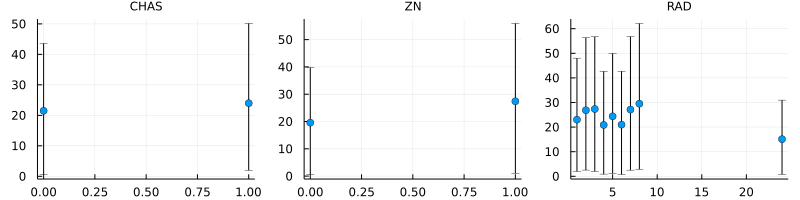

In [24]:
p = []
for k in keys(tables)
    push!(
        p,
        plot(
            tables[k][:, k], tables[k].mean, yerror=(tables[k].q5, 
            tables[k].q95), label=nothing, title=string(k), 
            seriestype=:scatter
        )
    )
end

plot(p..., layout=grid(1,3), size=(800, 200), titlefontsize=8)

# 15

**The RAD column doesn’t differentiate the MEDV feature well. Additionally, it is hard to interpret as we do not have an intuitive interpretation of the values. Drop this variable from the analysis.**

We drop the `RAD` column in the exact same manner as the `B` column.

In [25]:
select!(housing, Not(:RAD))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX
,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Float64
1,-5.06404,1.0,2.31,0,0.538,6.575,65.2,1.40854,296.0
2,-3.6005,0.0,7.07,0,0.469,6.421,78.9,1.60284,242.0
3,-3.60123,0.0,7.07,0,0.469,7.185,61.1,1.60284,242.0
4,-3.43052,0.0,2.18,0,0.458,6.998,45.8,1.80207,222.0
5,-2.67292,0.0,2.18,0,0.458,7.147,54.2,1.80207,222.0
6,-3.51157,0.0,2.18,0,0.458,6.43,58.7,1.80207,222.0
7,-2.42713,1.0,7.87,0,0.524,6.012,66.6,1.71569,311.0
8,-1.93413,1.0,7.87,0,0.524,6.172,96.1,1.78348,311.0
9,-1.55476,1.0,7.87,0,0.524,5.631,100.0,1.80535,311.0


In [26]:
describe(housing)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,CRIM,-0.795081,-5.06404,-1.39635,4.48837,0,Float64
2,ZN,0.263265,0.0,0.0,1.0,0,Float64
3,INDUS,11.1131,0.74,9.69,27.74,0,Float64
4,CHAS,0.0591837,0,0.0,1,0,Int64
5,NOX,0.554307,0.385,0.538,0.871,0,Float64
6,RM,6.24547,3.561,6.185,8.78,0,Float64
7,AGE,68.279,2.9,76.8,100.0,0,Float64
8,DIS,1.20077,0.128393,1.18659,2.49539,0,Float64
9,TAX,408.002,187.0,330.0,711.0,0,Float64


# 16

**Save the final dataset in Apache Arrow format.**

We use [`Arrow.write()` function](https://arrow.juliadata.org/stable/manual/#Arrow.write) to write our final dataframe to the Apache Arrow format.

In [27]:
Arrow.write("housing.arrow", housing)

"housing.arrow"